# Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from seaborn import heatmap

# Read and load dataset stays by region

In [12]:
#Number of nights booked

#List of useless columns
col_to_drop = ['Codes','Codes.1','Codes.2','Codes.3','Codes.4','Codes.5','Codes.6','Codes.7','Codes.8','Codes.9','Codes.10','Codes.11','Codes.12']
dict_new_col_H_FR_FR = {"Libellé":"Période"
                        ,"Nuitées dans l'hôtellerie - Français - Île-de-France":"FR-IDF_NH_FR"
                        ,"Nuitées dans l'hôtellerie - Français - Centre-Val de Loire":"FR-CVL_NH_FR"
                        ,"Nuitées dans l'hôtellerie - Français - Bourgogne-Franche-Comté":"FR-BFC_NH_FR"
                        ,"Nuitées dans l'hôtellerie - Français - Normandie":"FR-NOR_NH_FR"
                        ,"Nuitées dans l'hôtellerie - Français - Hauts-de-France":"FR-HDF_NH_FR"
                        ,"Nuitées dans l'hôtellerie - Français - Grand Est":"FR-GES_NH_FR"
                        ,"Nuitées dans l'hôtellerie - Français - Pays de la Loire":"FR-PDL_NH_FR"
                        ,"Nuitées dans l'hôtellerie - Français - Bretagne":"FR-BRE_NH_FR"
                        ,"Nuitées dans l'hôtellerie - Français - Nouvelle-Aquitaine":"FR-NAQ_NH_FR"
                        ,"Nuitées dans l'hôtellerie - Français - Occitanie":"FR-OCC_NH_FR"
                        ,"Nuitées dans l'hôtellerie - Français - Auvergne-Rhône-Alpes":"FR-ARA_NH_FR"
                        ,"Nuitées dans l'hôtellerie - Français - Provence-Alpes-Côte d'Azur":"FR-PAC_NH_FR"
                        ,"Nuitées dans l'hôtellerie - Français - Corse":"FR-COR_NH_FR"
                       }
dict_new_col_H_FR_Etranger = {"Libellé":"Période"
                        ,"Nuitées dans l'hôtellerie - Étrangers - Île-de-France":"FR-IDF_NH_ET"
                        ,"Nuitées dans l'hôtellerie - Étrangers - Centre-Val de Loire":"FR-CVL_NH_ET"
                        ,"Nuitées dans l'hôtellerie - Étrangers - Bourgogne-Franche-Comté":"FR-BFC_NH_ET"
                        ,"Nuitées dans l'hôtellerie - Étrangers - Normandie":"FR-NOR_NH_ET"
                        ,"Nuitées dans l'hôtellerie - Étrangers - Hauts-de-France":"FR-HDF_NH_ET"
                        ,"Nuitées dans l'hôtellerie - Étrangers - Grand Est":"FR-GES_NH_ET"
                        ,"Nuitées dans l'hôtellerie - Étrangers - Pays de la Loire":"FR-PDL_NH_ET"
                        ,"Nuitées dans l'hôtellerie - Étrangers - Bretagne":"FR-BRE_NH_ET"
                        ,"Nuitées dans l'hôtellerie - Étrangers - Nouvelle-Aquitaine":"FR-NAQ_NH_ET"
                        ,"Nuitées dans l'hôtellerie - Étrangers - Occitanie":"FR-OCC_NH_ET"
                        ,"Nuitées dans l'hôtellerie - Étrangers - Auvergne-Rhône-Alpes":"FR-ARA_NH_ET"
                        ,"Nuitées dans l'hôtellerie - Étrangers - Provence-Alpes-Côte d'Azur":"FR-PAC_NH_ET"
                        ,"Nuitées dans l'hôtellerie - Étrangers - Corse":"FR-COR_NH_ET"
                       }
dict_new_col_C_FR_FR = {"Libellé":"Période"
                        ,"Nuitées dans l'hôtellerie de plein air - Français - Île-de-France":"FR-IDF_NC_FR"
                        ,"Nuitées dans l'hôtellerie de plein air - Français - Centre-Val de Loire":"FR-CVL_NC_FR"
                        ,"Nuitées dans l'hôtellerie de plein air - Français - Bourgogne-Franche-Comté":"FR-BFC_NC_FR"
                        ,"Nuitées dans l'hôtellerie de plein air - Français - Normandie":"FR-NOR_NC_FR"
                        ,"Nuitées dans l'hôtellerie de plein air - Français - Hauts-de-France":"FR-HDF_NC_FR"
                        ,"Nuitées dans l'hôtellerie de plein air - Français - Grand Est":"FR-GES_NC_FR"
                        ,"Nuitées dans l'hôtellerie de plein air - Français - Pays de la Loire":"FR-PDL_NC_FR"
                        ,"Nuitées dans l'hôtellerie de plein air - Français - Bretagne":"FR-BRE_NC_FR"
                        ,"Nuitées dans l'hôtellerie de plein air - Français - Nouvelle-Aquitaine":"FR-NAQ_NC_FR"
                        ,"Nuitées dans l'hôtellerie de plein air - Français - Occitanie":"FR-OCC_NC_FR"
                        ,"Nuitées dans l'hôtellerie de plein air - Français - Auvergne-Rhône-Alpes":"FR-ARA_NC_FR"
                        ,"Nuitées dans l'hôtellerie de plein air - Français - Provence-Alpes-Côte d'Azur":"FR-PAC_NC_FR"
                        ,"Nuitées dans l'hôtellerie de plein air - Français - Corse":"FR-COR_NC_FR"
                       }
dict_new_col_C_FR_Etranger = {"Libellé":"Période"
                        ,"Nuitées dans l'hôtellerie de plein air - Étrangers - Île-de-France":"FR-IDF_NC_ET"
                        ,"Nuitées dans l'hôtellerie de plein air - Étrangers - Centre-Val de Loire":"FR-CVL_NC_ET"
                        ,"Nuitées dans l'hôtellerie de plein air - Étrangers - Bourgogne-Franche-Comté":"FR-BFC_NC_ET"
                        ,"Nuitées dans l'hôtellerie de plein air - Étrangers - Normandie":"FR-NOR_NC_ET"
                        ,"Nuitées dans l'hôtellerie de plein air - Étrangers - Hauts-de-France":"FR-HDF_NC_ET"
                        ,"Nuitées dans l'hôtellerie de plein air - Étrangers - Grand Est":"FR-GES_NC_ET"
                        ,"Nuitées dans l'hôtellerie de plein air - Étrangers - Pays de la Loire":"FR-PDL_NC_ET"
                        ,"Nuitées dans l'hôtellerie de plein air - Étrangers - Bretagne":"FR-BRE_NC_ET"
                        ,"Nuitées dans l'hôtellerie de plein air - Étrangers - Nouvelle-Aquitaine":"FR-NAQ_NC_ET"
                        ,"Nuitées dans l'hôtellerie de plein air - Étrangers - Occitanie":"FR-OCC_NC_ET"
                        ,"Nuitées dans l'hôtellerie de plein air - Étrangers - Auvergne-Rhône-Alpes":"FR-ARA_NC_ET"
                        ,"Nuitées dans l'hôtellerie de plein air - Étrangers - Provence-Alpes-Côte d'Azur":"FR-PAC_NC_ET"
                        ,"Nuitées dans l'hôtellerie de plein air - Étrangers - Corse":"FR-COR_NC_ET"
                       }

missing_period_index = ['2018-05','2018-04','2018-03','2018-02','2018-01']

#Reading stays files, deleting 2 first useless rows, renaming columns
df_H_FR_FR = pd.read_csv('Global_nuites_FR/Nuites_hotels_FR_FR_par_region.csv',sep=';')
df_H_FR_FR.drop(labels=col_to_drop,axis=1,inplace=True)
df_H_FR_FR = df_H_FR_FR[(df_H_FR_FR['Libellé']!='idBank')&(df_H_FR_FR['Libellé']!='Période')]
df_H_FR_FR.rename(columns=dict_new_col_H_FR_FR,inplace=True)
df_H_FR_FR.set_index('Période',inplace=True)

df_H_FR_Etranger = pd.read_csv('Global_nuites_FR/Nuites_hotels_FR_Etranger_par_region.csv',sep=';')
df_H_FR_Etranger.drop(labels=col_to_drop,axis=1,inplace=True)
df_H_FR_Etranger = df_H_FR_Etranger[(df_H_FR_Etranger['Libellé']!='idBank')&(df_H_FR_Etranger['Libellé']!='Période')]
df_H_FR_Etranger.rename(columns=dict_new_col_H_FR_Etranger,inplace=True)
df_H_FR_Etranger.set_index('Période',inplace=True)

df_C_FR_FR = pd.read_csv('Global_nuites_FR/Nuites_campings_FR_FR_par_region.csv',sep=';')
df_C_FR_FR.drop(labels=col_to_drop,axis=1,inplace=True)
df_C_FR_FR = df_C_FR_FR[(df_C_FR_FR['Libellé']!='idBank')&(df_C_FR_FR['Libellé']!='Période')]
df_C_FR_FR.rename(columns=dict_new_col_C_FR_FR,inplace=True)
df_C_FR_FR.set_index('Période',inplace=True)

df_C_FR_Etranger = pd.read_csv('Global_nuites_FR/Nuites_campings_FR_Etranger_par_region.csv',sep=';')
df_C_FR_Etranger.drop(labels=col_to_drop,axis=1,inplace=True)
df_C_FR_Etranger = df_C_FR_Etranger[(df_C_FR_Etranger['Libellé']!='idBank')&(df_C_FR_Etranger['Libellé']!='Période')]
df_C_FR_Etranger.rename(columns=dict_new_col_C_FR_Etranger,inplace=True)
df_C_FR_Etranger.set_index('Période',inplace=True)

min_max_index = df_H_FR_FR.index

min_index = '2016-01'
max_index = '2017-12'
min_max_index_to_apply = df_H_FR_FR.index[(df_H_FR_FR.index>=min_index)&(df_H_FR_FR.index<=max_index)]

#print(df_H_FR_FR.info())
#print(df_H_FR_Etranger.info())
#print(df_C_FR_FR.info())
#print(df_C_FR_Etranger.info())
#min_max_index_to_apply

# Read and load Airport dataset

In [3]:
#Airport dataset
df_airports = pd.read_csv('Other_DS/Airports_FR_2018_clean_by_regions.csv',sep=';')
df_airports.index = df_airports.Code+'-A-NB'
df_airports.drop(['Code','Nom'],axis=1,inplace=True)
df_airports.dropna(inplace=True)
df_airports = df_airports.transpose()

for i in min_max_index:
    new_row = pd.DataFrame(df_airports[df_airports.index=='Airports_nb'],columns=df_airports.columns)
    new_row.index = pd.Index([i])
    df_airports = df_airports.append(new_row)

df_airports = df_airports[df_airports.index!='Airports_nb']
df_airports = df_airports.sort_index(ascending=True)

#df_airports.head()

# Read and load heritage

In [4]:
df_heritage = pd.read_csv('Other_DS/Heritage_FR_2018_clean_by_regions.csv',sep=';')
df_heritage.index = df_heritage.Code+'-H-NB'
df_heritage.drop(['Code','Nom'],axis=1,inplace=True)
df_heritage.dropna(inplace=True)
df_heritage = df_heritage.transpose()

for i in min_max_index:
    new_row = pd.DataFrame(df_heritage[df_heritage.index=='Heritage_nb'],columns=df_heritage.columns)
    new_row.index = pd.Index([i])
    df_heritage = df_heritage.append(new_row)

df_heritage = df_heritage[df_heritage.index!='Heritage_nb']
df_heritage = df_heritage.sort_index(ascending=True)

df_heritage.head()

Code,FR-ARA-H-NB,FR-BFC-H-NB,FR-BRE-H-NB,FR-CVL-H-NB,FR-COR-H-NB,FR-GES-H-NB,FR-HDF-H-NB,FR-IDF-H-NB,FR-NOR-H-NB,FR-NAQ-H-NB,FR-OCC-H-NB,FR-PDL-H-NB,FR-PAC-H-NB
2010-01,3,5,1,3,1,7,3,4,2,5,6,0,3
2010-02,3,5,1,3,1,7,3,4,2,5,6,0,3
2010-03,3,5,1,3,1,7,3,4,2,5,6,0,3
2010-04,3,5,1,3,1,7,3,4,2,5,6,0,3
2010-05,3,5,1,3,1,7,3,4,2,5,6,0,3


# Read and load daysoff

In [5]:
# Import workalendar library from https://github.com/peopledoc/workalendar
import datetime as dt
from workalendar.europe import France
from calendar import monthrange

cal = France()

def daysoff(y,m):
    nbdays = monthrange(y, m)[1]
    return(nbdays - cal.get_working_days_delta(dt.date(y, m, 1), dt.date(y, m, nbdays)))

# Manually change range of years you want to calculate for here
dict_daysoff = {dt.date(y, m, 1).strftime('%Y-%m'): daysoff(y,m) for y in range(2010,2019) for m in range(1,13)}

daysoff_series = pd.Series(dict_daysoff)

daysoff_df = daysoff_series.to_frame()
daysoff_df.columns = ['NbDaysOff']

max_period = df_H_FR_FR.sort_index(ascending=False).index[0]
daysoff_df = daysoff_df[daysoff_df.index<=max_period]

# Read and load meteo dataset + processing

In [14]:
#Meteo dataset
df_meteo = pd.read_csv('Other_DS/meteo_2016_2017_train_ftra.csv',sep=',')
#print('nb lignes avant :',len(df_meteo))
df_meteo = df_meteo[(df_meteo.region!='ardeche')&(df_meteo.region!='ile-de-re')]
#print('nb lignes apres :',len(df_meteo))
df_meteo = df_meteo.rename(columns={'Température moyenne': 'AvgTemp'})

df_meteo['AvgTemp'] = df_meteo['AvgTemp'].map(lambda x: x.rstrip('°'))
#df_meteo['Température moyenne'] = df_meteo['Température moyenne'].map(lambda x: x.rstrip('°'))
#df_meteo['Température maximale'] = df_meteo['Température maximale'].map(lambda x: x.rstrip('°'))
#df_meteo['Température minimale'] = df_meteo['Température minimale'].map(lambda x: x.rstrip('°'))
#df_meteo['Température maximale record'] = df_meteo['Température maximale record'].map(lambda x: x.rstrip('°'))
#df_meteo['Température minimale record'] = df_meteo['Température minimale record'].map(lambda x: x.rstrip('°'))
#df_meteo['Vitesse du vent'] = df_meteo['Vitesse du vent'].map(lambda x: x.rstrip('km/h'))
#df_meteo['Température du vent'] = df_meteo['Température du vent'].map(lambda x: x.rstrip('°'))
#df_meteo['Précipitations moyennes par jour'] = df_meteo['Précipitations moyennes par jour'].map(lambda x: x.rstrip('mm'))
#df_meteo['Record de précipitations sur une journée'] = df_meteo['Record de précipitations sur une journée'].map(lambda x: x.rstrip('mm'))
#df_meteo['Humidité'] = df_meteo['Humidité'].map(lambda x: x.rstrip('%'))
#df_meteo['Visibilité'] = df_meteo['Visibilité'].map(lambda x: x.rstrip('km'))
#df_meteo['Couverture nuageuse'] = df_meteo['Couverture nuageuse'].map(lambda x: x.rstrip('%'))
#df_meteo.drop(['Heure du lever du soleil','Heure du coucher du soleil','Durée du jour','L\'avis de historique-meteo.net'],axis=1,inplace=True)

df_meteo = df_meteo[['year','month','region','AvgTemp']]
df_meteo.AvgTemp = df_meteo.AvgTemp.astype(float)
# Dict to map FR month names to month number and convert month name to number
month_format = dict(zip(df_meteo.month, range(1,13)))
df_meteo['month'] = df_meteo['month'].apply(lambda x: month_format[x])

#Calculating and adding Auvergne Rhone Alpe
#print('nb lignes auvergne :',len(df_meteo[df_meteo.region=='auvergne']))
#print('nb lignes rh-ne-alpes :',len(df_meteo[df_meteo.region=='rh-ne-alpes']))
df_meteo_ = pd.DataFrame(df_meteo[df_meteo.region=='auvergne'],columns=df_meteo.columns)
df_meteo_.reset_index(inplace=True)
df_meteo_['AvgTemp'] = (15582*df_meteo[df_meteo.region=='auvergne'].reset_index().AvgTemp + 43698*df_meteo[df_meteo.region=='rh-ne-alpes'].reset_index().AvgTemp)/(15582+43698)
df_meteo_.drop('index',axis=1,inplace=True)
df_meteo_['region'] = 'FR-ARA'
df_meteo = df_meteo.append(df_meteo_)
df_meteo = df_meteo[(df_meteo.region!='auvergne')&(df_meteo.region!='rh-ne-alpes')]
#print('nb lignes apres :',len(df_meteo))

#Calculating and adding Bourgogne Franche Comté
#print('nb lignes bourgogne :',len(df_meteo[df_meteo.region=='bourgogne']))
#print('nb lignes france-comte :',len(df_meteo[df_meteo.region=='franche-comte']))
df_meteo_ = pd.DataFrame(df_meteo[df_meteo.region=='bourgogne'],columns=df_meteo.columns)
df_meteo_.reset_index(inplace=True)
df_meteo_['AvgTemp'] = (31582*df_meteo[df_meteo.region=='bourgogne'].reset_index().AvgTemp + 16202*df_meteo[df_meteo.region=='franche-comte'].reset_index().AvgTemp)/(31582+16202)
df_meteo_.drop('index',axis=1,inplace=True)
df_meteo_['region'] = 'FR-BFC'
df_meteo = df_meteo.append(df_meteo_)
df_meteo = df_meteo[(df_meteo.region!='bourgogne')&(df_meteo.region!='franche-comte')]
#print('nb lignes apres :',len(df_meteo))

#Calculating and adding Champagne Ardenne Lorraine Alsace
#print('nb lignes champagne-ardenne :',len(df_meteo[df_meteo.region=='champagne-ardenne']))
#print('nb lignes lorraine :',len(df_meteo[df_meteo.region=='lorraine']))
#print('nb lignes alsace :',len(df_meteo[df_meteo.region=='alsace']))
df_meteo_ = pd.DataFrame(df_meteo[df_meteo.region=='champagne-ardenne'],columns=df_meteo.columns)
df_meteo_.reset_index(inplace=True)
df_meteo_['AvgTemp'] = (25606*df_meteo[df_meteo.region=='champagne-ardenne'].reset_index().AvgTemp + 23547*df_meteo[df_meteo.region=='lorraine'].reset_index().AvgTemp + 8280.17*df_meteo[df_meteo.region=='alsace'].reset_index().AvgTemp)/(25606+23547+8280.17)
df_meteo_.drop('index',axis=1,inplace=True)
df_meteo_['region'] = 'FR-GES'
df_meteo = df_meteo.append(df_meteo_)
df_meteo = df_meteo[(df_meteo.region!='champagne-ardenne')&(df_meteo.region!='lorraine')&(df_meteo.region!='alsace')]
#print('nb lignes apres :',len(df_meteo))

#Calculating and adding Nord-pas-de-calais Picardie
#print('nb lignes nord-pas-de-calais :',len(df_meteo[df_meteo.region=='nord-pas-de-calais']))
#print('nb lignes picardie :',len(df_meteo[df_meteo.region=='picardie']))
df_meteo_ = pd.DataFrame(df_meteo[df_meteo.region=='nord-pas-de-calais'],columns=df_meteo.columns)
df_meteo_.reset_index(inplace=True)
df_meteo_['AvgTemp'] = (12414*df_meteo[df_meteo.region=='nord-pas-de-calais'].reset_index().AvgTemp + 19399*df_meteo[df_meteo.region=='picardie'].reset_index().AvgTemp)/(12414+19399)
df_meteo_.drop('index',axis=1,inplace=True)
df_meteo_['region'] = 'FR-HDF'
df_meteo = df_meteo.append(df_meteo_)
df_meteo = df_meteo[(df_meteo.region!='nord-pas-de-calais')&(df_meteo.region!='picardie')]
#print('nb lignes apres :',len(df_meteo))

#Calculating and adding Champagne Ardenne Lorraine Alsace
#print('nb lignes poitou-charentes :',len(df_meteo[df_meteo.region=='poitou-charentes']))
#print('nb lignes limousin :',len(df_meteo[df_meteo.region=='limousin']))
#print('nb lignes aquitaine :',len(df_meteo[df_meteo.region=='aquitaine']))
df_meteo_ = pd.DataFrame(df_meteo[df_meteo.region=='poitou-charentes'],columns=df_meteo.columns)
df_meteo_.reset_index(inplace=True)
df_meteo_['AvgTemp'] = (25809*df_meteo[df_meteo.region=='poitou-charentes'].reset_index().AvgTemp + 16942*df_meteo[df_meteo.region=='limousin'].reset_index().AvgTemp + 41308*df_meteo[df_meteo.region=='aquitaine'].reset_index().AvgTemp)/(25809+16942+41308)
df_meteo_.drop('index',axis=1,inplace=True)
df_meteo_['region'] = 'FR-NAQ'
df_meteo = df_meteo.append(df_meteo_)
df_meteo = df_meteo[(df_meteo.region!='poitou-charentes')&(df_meteo.region!='limousin')&(df_meteo.region!='aquitaine')]
#print('nb lignes apres :',len(df_meteo))

#Calculating and adding Nord-pas-de-calais Picardie
#print('nb lignes languedoc-roussillon :',len(df_meteo[df_meteo.region=='languedoc-roussillon']))
#print('nb lignes midi-pyrenees :',len(df_meteo[df_meteo.region=='midi-pyrenees']))
df_meteo_ = pd.DataFrame(df_meteo[df_meteo.region=='languedoc-roussillon'],columns=df_meteo.columns)
df_meteo_.reset_index(inplace=True)
df_meteo_['AvgTemp'] = (27376*df_meteo[df_meteo.region=='languedoc-roussillon'].reset_index().AvgTemp + 45348*df_meteo[df_meteo.region=='midi-pyrenees'].reset_index().AvgTemp)/(27376+45348)
df_meteo_.drop('index',axis=1,inplace=True)
df_meteo_['region'] = 'FR-OCC'
df_meteo = df_meteo.append(df_meteo_)
df_meteo = df_meteo[(df_meteo.region!='languedoc-roussillon')&(df_meteo.region!='midi-pyrenees')]
#print('nb lignes apres :',len(df_meteo))

def rename_region(x,old,new):
    return(x.replace(old,new))

df_meteo.region = df_meteo.region.apply(lambda x: rename_region(x,'bretagne','FR-BRE'))
df_meteo.region = df_meteo.region.apply(lambda x: rename_region(x,'centre','FR-CVL'))
df_meteo.region = df_meteo.region.apply(lambda x: rename_region(x,'corse','FR-COR'))
df_meteo.region = df_meteo.region.apply(lambda x: rename_region(x,'ile-de-france','FR-IDF'))
df_meteo.region = df_meteo.region.apply(lambda x: rename_region(x,'normandie','FR-NOR'))
df_meteo.region = df_meteo.region.apply(lambda x: rename_region(x,'pays-de-la-loire','FR-PDL'))
df_meteo.region = df_meteo.region.apply(lambda x: rename_region(x,'provence-alpes-c-te-d-azur','FR-PAC'))

#df_meteo.head()

# Creating meteo data column by region

In [15]:
df_meteo_ARA = pd.DataFrame(df_meteo[df_meteo.region=='FR-ARA'],columns=df_meteo.columns)
df_meteo_ARA = df_meteo_ARA.rename(columns={'AvgTemp': 'FR-ARA_AvgTemp'})
df_meteo_ARA.reset_index(inplace=True)
df_meteo_BFC = pd.DataFrame(df_meteo[df_meteo.region=='FR-BFC'],columns=df_meteo.columns)
df_meteo_BFC = df_meteo_BFC.rename(columns={'AvgTemp': 'FR-BFC_AvgTemp'})
df_meteo_BFC.reset_index(inplace=True)
df_meteo_BRE = pd.DataFrame(df_meteo[df_meteo.region=='FR-BRE'],columns=df_meteo.columns)
df_meteo_BRE = df_meteo_BRE.rename(columns={'AvgTemp': 'FR-BRE_AvgTemp'})
df_meteo_BRE.reset_index(inplace=True)
df_meteo_CVL = pd.DataFrame(df_meteo[df_meteo.region=='FR-CVL'],columns=df_meteo.columns)
df_meteo_CVL = df_meteo_CVL.rename(columns={'AvgTemp': 'FR-CVL_AvgTemp'})
df_meteo_CVL.reset_index(inplace=True)
df_meteo_COR = pd.DataFrame(df_meteo[df_meteo.region=='FR-COR'],columns=df_meteo.columns)
df_meteo_COR = df_meteo_COR.rename(columns={'AvgTemp': 'FR-COR_AvgTemp'})
df_meteo_COR.reset_index(inplace=True)
df_meteo_GES = pd.DataFrame(df_meteo[df_meteo.region=='FR-GES'],columns=df_meteo.columns)
df_meteo_GES = df_meteo_GES.rename(columns={'AvgTemp': 'FR-GES_AvgTemp'})
df_meteo_GES.reset_index(inplace=True)
df_meteo_HDF = pd.DataFrame(df_meteo[df_meteo.region=='FR-HDF'],columns=df_meteo.columns)
df_meteo_HDF = df_meteo_HDF.rename(columns={'AvgTemp': 'FR-HDF_AvgTemp'})
df_meteo_HDF.reset_index(inplace=True)
df_meteo_IDF = pd.DataFrame(df_meteo[df_meteo.region=='FR-IDF'],columns=df_meteo.columns)
df_meteo_IDF = df_meteo_IDF.rename(columns={'AvgTemp': 'FR-IDF_AvgTemp'})
df_meteo_IDF.reset_index(inplace=True)
df_meteo_NOR = pd.DataFrame(df_meteo[df_meteo.region=='FR-NOR'],columns=df_meteo.columns)
df_meteo_NOR = df_meteo_NOR.rename(columns={'AvgTemp': 'FR-NOR_AvgTemp'})
df_meteo_NOR.reset_index(inplace=True)
df_meteo_NAQ = pd.DataFrame(df_meteo[df_meteo.region=='FR-NAQ'],columns=df_meteo.columns)
df_meteo_NAQ = df_meteo_NAQ.rename(columns={'AvgTemp': 'FR-NAQ_AvgTemp'})
df_meteo_NAQ.reset_index(inplace=True)
df_meteo_OCC = pd.DataFrame(df_meteo[df_meteo.region=='FR-OCC'],columns=df_meteo.columns)
df_meteo_OCC = df_meteo_OCC.rename(columns={'AvgTemp': 'FR-OCC_AvgTemp'})
df_meteo_OCC.reset_index(inplace=True)
df_meteo_PDL = pd.DataFrame(df_meteo[df_meteo.region=='FR-PDL'],columns=df_meteo.columns)
df_meteo_PDL = df_meteo_PDL.rename(columns={'AvgTemp': 'FR-PDL_AvgTemp'})
df_meteo_PDL.reset_index(inplace=True)
df_meteo_PAC = pd.DataFrame(df_meteo[df_meteo.region=='FR-PAC'],columns=df_meteo.columns)
df_meteo_PAC = df_meteo_PAC.rename(columns={'AvgTemp': 'FR-PAC_AvgTemp'})
df_meteo_PAC.reset_index(inplace=True)

df_meteo_all = pd.concat([df_meteo_ARA
                          ,df_meteo_BFC['FR-BFC_AvgTemp']
                          ,df_meteo_BRE['FR-BRE_AvgTemp']
                          ,df_meteo_CVL['FR-CVL_AvgTemp']
                          ,df_meteo_COR['FR-COR_AvgTemp']
                          ,df_meteo_GES['FR-GES_AvgTemp']
                          ,df_meteo_HDF['FR-HDF_AvgTemp']
                          ,df_meteo_IDF['FR-IDF_AvgTemp']
                          ,df_meteo_NOR['FR-NOR_AvgTemp']
                          ,df_meteo_NAQ['FR-NAQ_AvgTemp']
                          ,df_meteo_OCC['FR-OCC_AvgTemp']
                          ,df_meteo_PDL['FR-PDL_AvgTemp']
                          ,df_meteo_PAC['FR-PAC_AvgTemp']
                         ]
                         ,axis=1)
#df_meteo_all['Période'] = df_meteo_all['year']+'-'+df_meteo_all['m']
#df_meteo_all['Période'] = dt.date(df_meteo_all['year'], df_meteo_all['month'], 1).strftime('%Y-%m')
#len([dt.date(y, m, 1).strftime('%Y-%m') for y in df_meteo_all['year'] for m in df_meteo_all['month']])
#len(df_meteo_all)
df_meteo_all['Période'] = None

for r in range(len(df_meteo_all)):
    df_meteo_all.loc[r,'Période'] = dt.date(df_meteo_all.loc[r,'year'], df_meteo_all.loc[r,'month'], 1).strftime('%Y-%m')
df_meteo_all = df_meteo_all.set_index('Période')
df_meteo_all.drop(['index','year','month','region'],axis=1,inplace=True)
#df_meteo_all

In [20]:
df_H_FR_FR.head(10)

,NH_FR_IDF,NH_FR_CVL,NH_FR_BFC,NH_FR_NOR,NH_FR_HDF,NH_FR_GES,NH_FR_PDL,NH_FR_BRE,NH_FR_NAQ,NH_FR_OCC,NH_FR_ARA,NH_FR_PAC,NH_FR_COR
Période,,,,,,,,,,,,,
2018-05,2426.67,464.64,476.85,603.57,601.43,815.59,611.31,646.32,1217.16,1110.27,1356.11,1199.99,311.46
2018-04,2462.12,420.93,400.27,546.89,577.02,734.32,573.27,551.84,1091.46,955.46,1312.37,1107.88,156.78
2018-03,2671.91,342.79,414.30,445.37,524.85,699.66,469.12,476.93,962.14,796.92,1722.04,1027.02,42.67
2018-02,2276.45,274.76,340.01,361.79,442.51,597.22,394.33,375.33,709.13,679.61,1551.92,850.80,29.49
2018-01,2453.27,263.71,306.35,316.97,457.68,589.63,367.57,347.29,637.87,597.66,1271.09,754.81,24.82
2017-12,2655.76,297.19,338.16,368.23,501.89,928.05,391.57,379.62,718.16,668.17,1270.75,740.94,31.98
2017-11,2708.99,326.60,369.85,436.61,555.40,776.54,445.84,445.19,839.62,697.67,1113.50,791.97,42.37
2017-10,2701.40,405.76,449.53,522.27,603.49,849.84,512.84,553.45,1167.51,1027.60,1317.54,1125.72,184.71
2017-09,2457.28,434.84,491.42,553.37,618.07,872.70,613.33,657.08,1292.05,1197.92,1449.89,1302.12,401.71


In [22]:
df_C_FR_FR.head(10)

,NC_FR_IDF,NC_FR_CVL,NC_FR_BFC,NC_FR_NOR,NC_FR_HDF,NC_FR_GES,NC_FR_PDL,NC_FR_BRE,NC_FR_NAQ,NC_FR_OCC,NC_FR_ARA,NC_FR_PAC,NC_FR_COR
Période,,,,,,,,,,,,,
2017-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,63.76,77.69,113.09,159.92,104.33,121.57,557.66,561.79,1333.65,1469.73,511.84,853.81,304.98
2017-08,96.76,369.41,513.09,780.79,451.10,442.43,3900.75,3458.34,8106.51,7776.18,3164.74,3799.31,1013.20
2017-07,114.31,330.68,436.13,616.76,370.44,353.92,3049.49,2717.08,6025.42,5759.27,2392.51,3000.50,849.53
2017-06,97.52,137.10,165.09,239.10,163.26,159.07,801.94,760.17,1467.32,1703.45,807.27,1012.06,289.88
2017-05,88.99,118.16,123.57,228.34,149.64,120.87,669.04,644.29,1052.54,1048.14,559.16,688.36,112.20
2017-04,86.05,95.92,54.97,218.04,137.97,90.47,778.99,721.45,1258.10,1023.78,384.62,744.89,77.73


In [8]:
for i in missing_period_index:
    if i not in df_C_FR_FR.index:
        new_row = pd.DataFrame([[None,None,None,None,None,None,None,None,None,None,None,None,None,i]],columns=df_C_FR_FR.columns.append(pd.Index(['Période'])))
        new_row = new_row.set_index('Période')
        df_C_FR_FR = df_C_FR_FR.append(new_row)
    df_C_FR_FR = df_C_FR_FR.sort_index(ascending=True)
    if i not in df_C_FR_Etranger.index:
        new_row = pd.DataFrame([[None,None,None,None,None,None,None,None,None,None,None,None,None,i]],columns=df_C_FR_Etranger.columns.append(pd.Index(['Période'])))
        new_row = new_row.set_index('Période')
        df_C_FR_Etranger = df_C_FR_Etranger.append(new_row)
    df_C_FR_Etranger = df_C_FR_Etranger.sort_index(ascending=True)

df_H_FR_FR = df_H_FR_FR.sort_index(ascending=True)
df_H_FR_Etranger = df_H_FR_Etranger.sort_index(ascending=True)

#print(df_C_FR_FR.tail())
#print(df_C_FR_Etranger.tail())
#print(df_H_FR_FR.tail())
#print(df_H_FR_Etranger.tail())

# Create global dataset

In [16]:
#df_meteo_all

df_global = pd.concat([df_C_FR_FR,df_C_FR_Etranger,df_H_FR_FR,df_H_FR_Etranger,daysoff_df,df_meteo_all,df_airports,df_heritage],axis=1)

df_global.to_csv('touristcast_global_DS.csv')

df_global.info()
df_global.head()

<class 'pandas.core.frame.DataFrame'>
Index: 101 entries, 2010-01 to 2018-05
Data columns (total 92 columns):
FR-IDF_NC_FR      48 non-null float64
FR-CVL_NC_FR      48 non-null float64
FR-BFC_NC_FR      48 non-null float64
FR-NOR_NC_FR      48 non-null float64
FR-HDF_NC_FR      48 non-null float64
FR-GES_NC_FR      48 non-null float64
FR-PDL_NC_FR      48 non-null float64
FR-BRE_NC_FR      48 non-null float64
FR-NAQ_NC_FR      48 non-null float64
FR-OCC_NC_FR      48 non-null float64
FR-ARA_NC_FR      48 non-null float64
FR-PAC_NC_FR      48 non-null float64
FR-COR_NC_FR      48 non-null float64
FR-IDF_NC_ET      48 non-null float64
FR-CVL_NC_ET      48 non-null float64
FR-BFC_NC_ET      48 non-null float64
FR-NOR_NC_ET      48 non-null float64
FR-HDF_NC_ET      48 non-null float64
FR-GES_NC_ET      48 non-null float64
FR-PDL_NC_ET      48 non-null float64
FR-BRE_NC_ET      48 non-null float64
FR-NAQ_NC_ET      48 non-null float64
FR-OCC_NC_ET      48 non-null float64
FR-ARA_NC_ET    

C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


,FR-IDF_NC_FR,FR-CVL_NC_FR,FR-BFC_NC_FR,FR-NOR_NC_FR,FR-HDF_NC_FR,FR-GES_NC_FR,FR-PDL_NC_FR,FR-BRE_NC_FR,FR-NAQ_NC_FR,FR-OCC_NC_FR,...,FR-CVL-H-NB,FR-COR-H-NB,FR-GES-H-NB,FR-HDF-H-NB,FR-IDF-H-NB,FR-NOR-H-NB,FR-NAQ-H-NB,FR-OCC-H-NB,FR-PDL-H-NB,FR-PAC-H-NB
2010-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1,7,3,4,2,5,6,0,3
2010-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1,7,3,4,2,5,6,0,3
2010-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1,7,3,4,2,5,6,0,3
2010-04,63.65,44.52,28.64,143.52,56.02,47.73,433.35,365.68,624.79,513.75,...,3,1,7,3,4,2,5,6,0,3
2010-05,67.68,94.46,82.30,186.42,84.02,96.85,506.49,443.73,709.12,784.57,...,3,1,7,3,4,2,5,6,0,3


# Heatmap

C:\Users\franc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


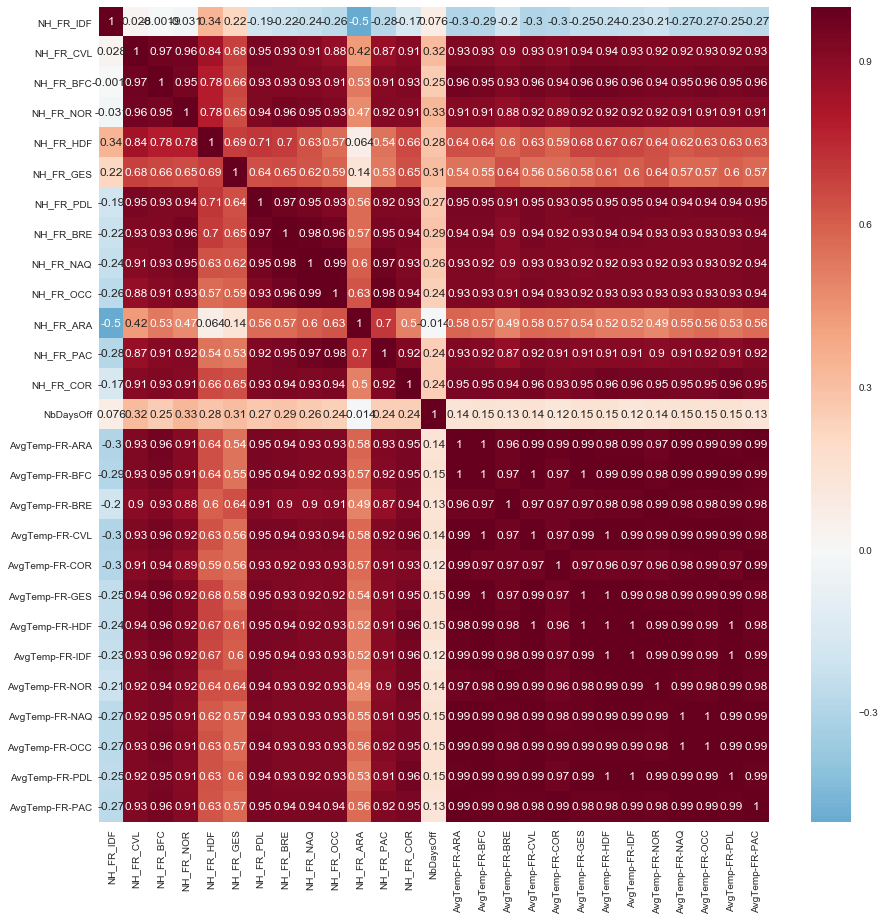

In [24]:
#df_airports not used because datass are constant overtime
df_to_test = pd.concat([df_H_FR_FR,daysoff_df,df_meteo_all],axis=1)

plt.figure(figsize=(15,15))
heatmap(df_to_test.corr(),annot=True,center=0,cmap='RdBu_r')

# Pairplot

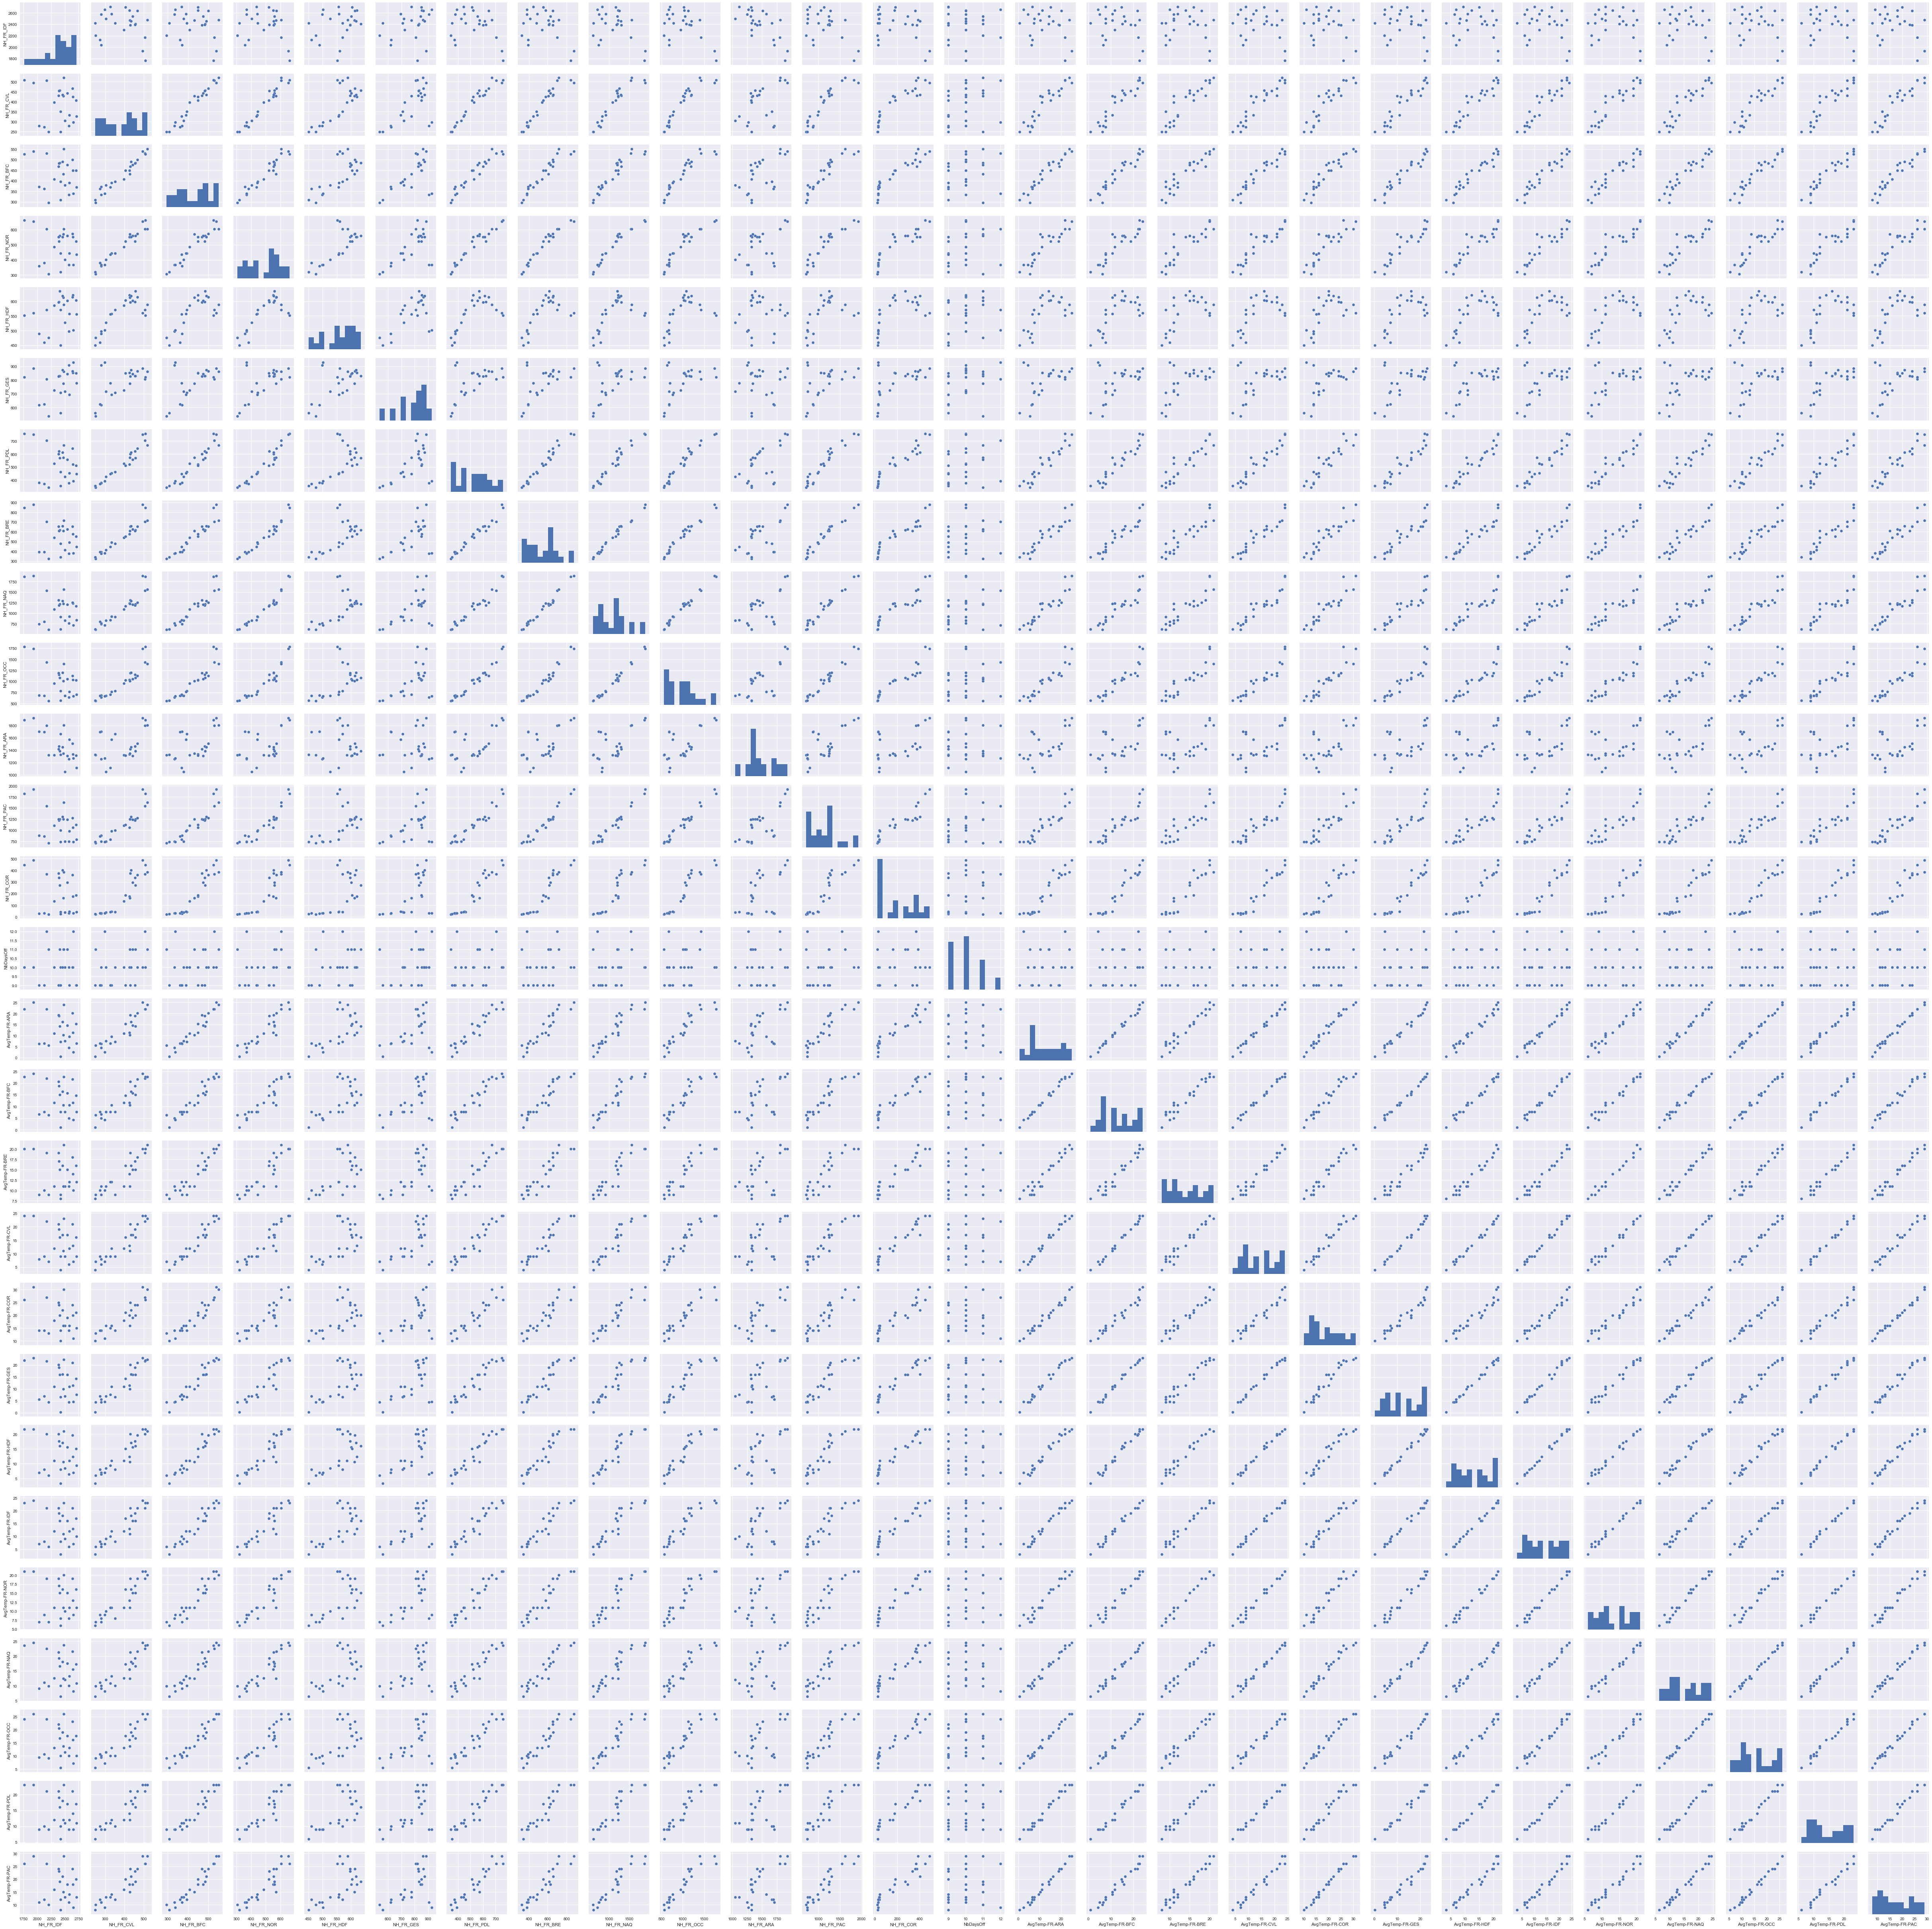

In [21]:
df_to_test_ = df_to_test.dropna()
sns.pairplot(df_to_test_)

In [19]:
df_to_test.head()

,NH_FR_IDF,NH_FR_CVL,NH_FR_BFC,NH_FR_NOR,NH_FR_HDF,NH_FR_GES,NH_FR_PDL,NH_FR_BRE,NH_FR_NAQ,NH_FR_OCC,...,AvgTemp-FR-CVL,AvgTemp-FR-COR,AvgTemp-FR-GES,AvgTemp-FR-HDF,AvgTemp-FR-IDF,AvgTemp-FR-NOR,AvgTemp-FR-NAQ,AvgTemp-FR-OCC,AvgTemp-FR-PDL,AvgTemp-FR-PAC
2010-01,2462.71,226.57,291.74,307.24,404.15,497.81,309.11,255.14,555.97,534.40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02,2303.15,247.74,373.28,335.33,437.46,545.72,318.54,305.72,682.27,647.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03,2828.36,329.58,403.37,422.87,529.83,632.50,417.20,395.93,840.23,736.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04,2714.11,376.22,419.20,551.26,560.27,687.56,460.81,515.72,1087.84,971.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05,2911.72,442.64,482.02,587.63,600.12,785.44,490.38,576.19,1173.60,1092.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
